# notebook for movie analysis try1 230810

In [ ]:
# 問題点と対策  
1. ボールの(画像上での)形状が変わる  
- 形状が変わったボールの画像を準備して、それを20°ずつ回転させたverをさらに準備して(合計9個)参照させる。
2. ボール以外を検出する
- 実際の差分白黒画像のボールを参照させる。
3. ボールが画面の外にある時間がある。
- 検出閾値を設定する。

In [1]:
import cv2
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np

# main part

In [58]:
#data_path
path = 'C:/Users/imyme/movie_analysis_2310/data/IMG_0527.MOV'

#path for referenced temlate
#tmp_pic = 'C:/Users/imyme/movie_analysis_2310/data/ball1.jpg'
#normal ball data
tmp_path_normal = 'C:/Users/imyme/movie_analysis_2310/data/tmp_normalball2.jpg'
#fast ball data
tmp_path_sp = 'C:/Users/imyme/movie_analysis_2310/data/tmp_speedball.jpg'

#if use tmp_normalball3.jpg, this is True
use_ball3 = False

#case1: apply original image for detection
#tmp_pic = cv2.imread(tmp_path)
#apply gray color
#tmp_pic_gray = cv2.cvtColor(tmp_pic, cv2.COLOR_RGB2GRAY)



#case2: apply normal and speed ball pictures pictured on a differential frame
tmp_ball_list=[]

#read the normal ball pic and convert it to gray scale image
tmp_pic_gray = cv2.imread(tmp_path_normal)
tmp_pic_gray = cv2.cvtColor(tmp_pic_gray, cv2.COLOR_RGB2GRAY)

#append normal pic
tmp_ball_list.append(tmp_pic_gray)

#read fast ball picx
tmp_sp_ball = cv2.imread(tmp_path_sp)
for angle in [20*i for i in range(9)]: 
    #prepare affine conversion matrix
    rotate_matrix = cv2.getRotationMatrix2D(center=(33,33), angle=angle, scale=1)

    #apply affince conversion matrix
    rotated_image = cv2.warpAffine(src=tmp_sp_ball, M=rotate_matrix, dsize=(66, 65))
    
    #reduce dimension
    tmp_pic_gray = cv2.cvtColor(rotated_image, cv2.COLOR_RGB2GRAY)
    
    #speed_ball_listを作成
    tmp_ball_list.append(tmp_pic_gray)

    

#capture video
cap = cv2.VideoCapture(path)


#width
print(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

#hight
print(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

#frames per second
print(cap.get(cv2.CAP_PROP_FPS))

#num of all frames
print(cap.get(cv2.CAP_PROP_FRAME_COUNT))

#current frame
print(cap.get(cv2.CAP_PROP_POS_FRAMES))

#used to check maxvals
maxvals_record = []


while True :

    #get frame info
    ret, img = cap.read()
    
    # break while roup when ret is False
    if ret == False:
        break
    
    #initialization of used variables
    maxLoc = []
    maxVal = 0
    result = []
    maxLocs = []
    maxVals = []
    max_index = 0
    
    #differential frames : img_diff
    if i != 1:
        img_diff=cv2.absdiff(img,img_prev)
        
        #apply gray color for calculation
        img_diff_gray = cv2.cvtColor(img_diff, cv2.COLOR_RGB2GRAY)
        
        #matchtemplate Case1
        #maxLoc has the location of ball
        #result = cv2.matchTemplate(img_diff_gray, tmp_pic_gray, cv2.TM_CCOEFF_NORMED )
        #minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

        
        #matchtemplate Case2
        for tmp_pic in tmp_ball_list:
            result = cv2.matchTemplate(img_diff_gray, tmp_pic, cv2.TM_CCOEFF_NORMED )
            minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)
            maxVals.append(maxVal)
            maxLocs.append(maxLoc)
        
        
        #get maximum value and location
        maxVal = max(maxVals)
        max_index = maxVals.index(maxVal)
        maxLoc = maxLocs[max_index]
        
        #show differential frames
        cv2.imshow("window2",img_diff)
        cv2.waitKey(30)
        
        #save image 
        #if i % 30 == 0:
        #    cv2.imwrite(f'C:/Users/imyme/movie_analysis_2310/data/img_example_{i}.jpg',img_diff_gray)
    
    

    #for the record of the maxVal
    maxvals_record.append(maxVal)
    
    #get the previous image here to get differential frame in the next roup
    img_prev = img.copy()
    
    #show ball detection
    #0.6 is threshhold for detection
    if maxLoc != [] and maxVal > 0.6:
        #size of ball3 pic is smaller than ball2
        if max_index == 0 and use_ball3 == True:
            cv2.rectangle(
                img, maxLoc, 
                (maxLoc[0]+32, maxLoc[1]+32),
                color=(0,0,255),
                thickness= 4)
        else:      
            cv2.rectangle(
                img, maxLoc, 
                (maxLoc[0]+66, maxLoc[1]+65),
                color=(0,0,255),
                thickness= 4)
        
        #put text to the pic to show the value
        cv2.putText(img,
            text=f'val:{maxVal:.2f}',
            org=(max(0,maxLoc[0]-30), max(0,maxLoc[1]-30)),
            fontFace=cv2.FONT_HERSHEY_SIMPLEX,
            fontScale=0.5,
            color=(0, 255, 0),
            thickness=1,
            lineType=cv2.LINE_4)
    
    #動画表示
    cv2.imshow("window1",img)
    
    cv2.waitKey(30)
    
    i +=1

#close movie
cap.release()

cv2.destroyAllWindows()

1920.0
1080.0
29.97002997002997
562.0
0.0


In [34]:
img = plt.imread('C:/Users/imyme/movie_analysis_2310/data/img_example.jpg')
img.shape

(1080, 1920, 3)

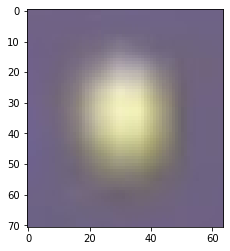

In [54]:
tmp = plt.imread(tmp_path)
plt.imshow(tmp)

In [24]:
exp_path = 'C:/Users/imyme/movie_analysis_2310/data/img_example.jpg'
tmp_path = 'C:/Users/imyme/movie_analysis_2310/data/ball1.jpg'

result = cv2.matchTemplate(cv2.imread(exp_path), cv2.imread(tmp_path), cv2.TM_CCOEFF_NORMED )
minVal, maxVal, minLoc, maxLoc = cv2.minMaxLoc(result)

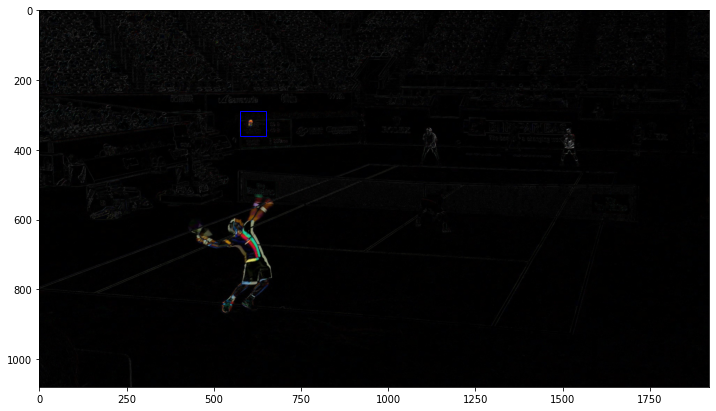

In [50]:
#show figure with detection
plt.figure(figsize=(12,16))
ax=plt.axes()

plt.imshow(img)
r=mpl.patches.Rectangle([maxLoc[0],maxLoc[1]], 75,71,fill=False,edgecolor = 'blue')

ax.add_patch(r)
plt.show()

In [20]:
img_t = cv2.imread(tmp_path)
img_t.shape

(75, 71, 3)

In [23]:
img_e = cv2.imread(exp_path)
img_e.shape

(1080, 1920, 3)

# maxvals_record

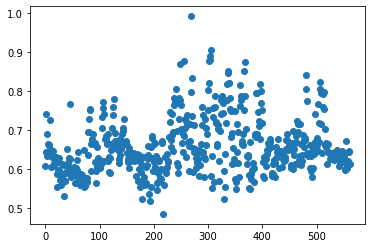

In [54]:
plt.scatter(np.arange(0,len(maxvals_record)),maxvals_record)
plt.show()

In [55]:
# referenced pic

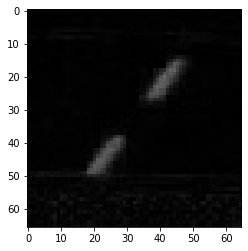

In [56]:
tmp_sp=plt.imread('C:/Users/imyme/movie_analysis_2310/data/tmp_speedball.jpg')
plt.imshow(tmp_sp)
plt.show()

In [22]:
tmp_sp.shape

(66, 65, 3)

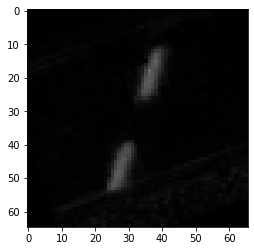

In [57]:
#affine matrix conversion
rotate_matrix = cv2.getRotationMatrix2D(center=(33,33), angle=20, scale=1)
rotated_image = cv2.warpAffine(src=tmp_sp, M=rotate_matrix, dsize=(66, 65))
plt.imshow(rotated_image)
plt.show()